In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.datasets

import sklearn

In [2]:
# Functions
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv

# Tools
from sklearn.model_selection import HalvingRandomSearchCV

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [174]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [175]:
X_final_train_images, X_final_test_images, y_final_train, y_final_test = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)

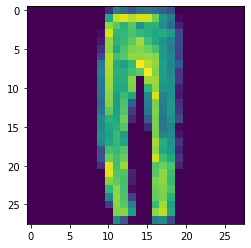

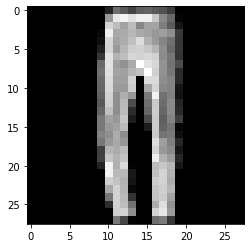

1


In [5]:
# origin
plt.imshow(X_final_train_images[0])
plt.show()

# grayscale 
plt.imshow(X_final_train_images[0], cmap='gray')
plt.show()

print(y_final_train[0])

def print_sample(img):
    plt.imshow(img, cmap='gray')
    plt.show()

In [176]:
X_train_images, X_test_images, y_train, y_test = train_test_split(X_final_train_images, y_final_train, test_size=0.3, random_state=11)

In [7]:
X_train = X_train_images.reshape(X_train_images.shape[0], 784)
X_test = X_test_images.reshape(X_test_images.shape[0], 784)

In [8]:
# Try first random forast
rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)
# 87.43%

0.8743650793650793

In [18]:
X_train_images, X_test_images, y_train, y_test = train_test_split(X_final_train_images, y_final_train, test_size=0.95, random_state=11)
X_train_images, X_test_images, y_train, y_test = train_test_split(X_train_images, y_train, test_size=0.3, random_state=11)

print(len(X_train_images), ":", len(X_test_images))

1470 : 630


In [21]:
X_train = X_train_images.reshape(X_train_images.shape[0], 784)
X_test = X_test_images.reshape(X_test_images.shape[0], 784)

In [30]:
# Try first random forast
rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)
# 85.10% in 10 sec

0.8510582010582011

In [77]:
SEPERATES_COUNT = 5

seperates = np.linspace(0, 255, SEPERATES_COUNT).tolist()

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

def add_seperates_sum(arr: np.array):
    for i in range(1, SEPERATES_COUNT):
        arr['sep_' + str(i)] = ((seperates[i-1] <= arr) & (arr <= seperates[i])).sum()
    
    return arr

X_train_df = X_train_df.apply(add_seperates_sum, axis=1)
X_test_df = X_test_df.apply(add_seperates_sum, axis=1)

In [78]:
rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train_df, y_train)

rfc.score(X_test_df, y_test)
# Not work

c:\users\omer2\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\omer2\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8507936507936508

In [97]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

def add_seperates_sum(arr: np.array):
    arr['zero'] = (arr == 0).sum()

    return arr

X_train_df = X_train_df.apply(add_seperates_sum, axis=1)
X_test_df = X_test_df.apply(add_seperates_sum, axis=1)

In [96]:
rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train_df, y_train)

rfc.score(X_test_df, y_test)
# 85.47%

c:\users\omer2\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\omer2\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8547619047619047

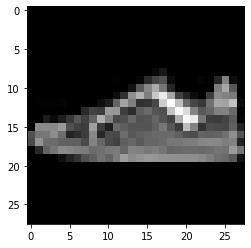

541
243


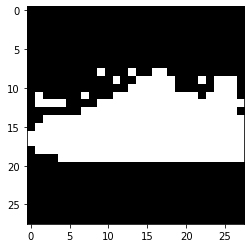

In [10]:
img = X_train_images[0]

print_sample(img)

print((img == 0).sum())
print((img != 0).sum())

img = ((img == 0) == False)
print_sample(img)

# 0   - is Black, background
# 255 - is White

In [22]:
# make it background and exists
# background - 0
# exists - 1

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

def add_seperates_sum(arr: np.array):    
    arr = (arr != 0)
    return arr

X_train_df = X_train_df.apply(add_seperates_sum, axis=1)
X_test_df = X_test_df.apply(add_seperates_sum, axis=1)

rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train_df, y_train)

rfc.score(X_test_df, y_test)
# 85.87%

0.8301587301587302

In [201]:
# Try to remove the edges
def images_to_vectors(images):
    return images.reshape(images.shape[0], images.shape[1] * images.shape[2])

X_train_images2 = X_train_images.copy()
X_test_images2 = X_test_images.copy()

X_train_images2 = X_train_images2 != 0
X_test_images2 = X_test_images2 != 0

PANDING = 4

new_arr = list()
i = 0
for img in X_train_images2:
    img = img[PANDING:29-PANDING, PANDING:29-PANDING]
    new_arr.append(img.tolist())
    i += 1
    
X_train_images2 = np.array(new_arr)

new_arr = list()
i = 0
for img in X_test_images2:
    img = img[PANDING:29-PANDING, PANDING:29-PANDING]
    new_arr.append(img.tolist())
    i += 1

X_test_images2 = np.array(new_arr)
        
X_train_df = pd.DataFrame(images_to_vectors(X_train_images2))
X_test_df = pd.DataFrame(images_to_vectors(X_test_images2))

rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train_df, y_train)

rfc.score(X_test_df, y_test)
# 80.97%
# But is not good!

0.8097883597883598

In [8]:
# Useing pipelines
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [25]:
steps = [
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

#model.fit(X_train_images, y_train)

#model.sorce(X_test_images, y_test)

model.fit(X_train_df, y_train)

model.score(X_test_df, y_test)

0.8301587301587302

In [27]:
class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, x, y = None):
        return x

steps = [
    ('PreProcessing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

#model.fit(X_train_images, y_train)

#model.sorce(X_test_images, y_test)

model.fit(X_train_df, y_train)

model.score(X_test_df, y_test)

0.8301587301587302

In [29]:
class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_vector = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
        
        X_df = pd.DataFrame(X_vector)
        
        return X_df

steps = [
    ('PreProcessing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

0.8174603174603174

In [31]:
# Make it boolean of it background or it not
# 0 - it background
# 1 - it exists (it background)

class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images = X_images != 0
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                
        X_df = pd.DataFrame(X_vectors)
        
        return X_df

steps = [
    ('PreProcessing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

0.8301587301587302

In [36]:
# Add sum of

class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images = X_images != 0
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
        
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
                    
        X_df = pd.DataFrame(X_vectors)
        
        return X_df

steps = [
    ('PreProcessing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

0.834920634920635

In [39]:
# Make the model stable

from sklearn.model_selection import RandomizedSearchCV

class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images = X_images != 0
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                    
        X_df = pd.DataFrame(X_vectors)
        
        return X_df

steps = [
    ('PreProcessing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

param_grid = {
}

model = RandomizedSearchCV(
    model, param_grid, 
    n_iter = 10,
    cv = 3
)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

D:\Projects\Python\data-science-walmart-and-more\venv\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.8301587301587302

In [42]:
# Make the model stable

from sklearn.model_selection import RandomizedSearchCV

class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images = X_images != 0
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                  
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
            
        X_df = pd.DataFrame(X_vectors)
        
        return X_df

steps = [
    ('PreProcessing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

param_grid = {
}

model = RandomizedSearchCV(
    model, param_grid, 
    n_iter = 10,
    cv = 3
)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

D:\Projects\Python\data-science-walmart-and-more\venv\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.834920634920635

In [43]:
# Add flag of when it background
BACKGROUND_LIMT = 3

from sklearn.model_selection import RandomizedSearchCV

class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images = X_images > BACKGROUND_LIMT
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                  
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
            
        X_df = pd.DataFrame(X_vectors)
        
        return X_df

steps = [
    ('PreProcessing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

param_grid = {
}

model = RandomizedSearchCV(
    model, param_grid, 
    n_iter = 10,
    cv = 3
)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

D:\Projects\Python\data-science-walmart-and-more\venv\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.8444444444444444

In [68]:
# upgrade background_limit to param
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self, background_limit=0, **kwargs):
        self.background_limit = background_limit
        
        self._param_names = ['background_limit'] + list(kwargs.keys())
        for key, value in kwargs.items():
            setattr(self, key, value)
        
    def get_params(self, deep=True):
        return { param: getattr(self, param) for param in self._param_names}
        
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
                
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
                
        X_images = X_images > self.background_limit
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                  
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
            
        X_df = pd.DataFrame(X_vectors)
        
        return X_df

steps = [
    ('pre_processing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

param_grid = {
    'pre_processing__background_limit': [0,1,2,3,4,5,6,7,9,10]
}

model = GridSearchCV(
    model, param_grid,
    cv = 3
)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

0.8333333333333334

In [69]:
model.best_params_

{'pre_processing__background_limit': 9}

In [7]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [9]:
# trying to find the best background_limit

class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self, background_limit=0, **kwargs):
        self.background_limit = background_limit
        
        self._param_names = ['background_limit'] + list(kwargs.keys())
        for key, value in kwargs.items():
            setattr(self, key, value)
        
    def get_params(self, deep=True):
        return { param: getattr(self, param) for param in self._param_names}
        
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
                
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
                
        X_images = X_images > self.background_limit
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                  
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
            
        X_df = pd.DataFrame(X_vectors)
        
        return X_df

steps = [
    ('pre_processing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

param_grid = {
    'pre_processing__background_limit': [0, 3, 9]
}

model = GridSearchCV(
    model, param_grid,
    cv = 5
)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

# 0 - gives 83.49% - defualt
# 3 - gives 84.44% - best score
# 9 - gives 83.33% - best param ?

KeyboardInterrupt: 

In [20]:
# Visual Colors Count

X_images = X_train_images
y = y_train

X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])

new_data = list()

i = 0
for x_vector in X_vectors:
    vector = list()
    for color in range(0, 256, 1):
             vector = np.append(vector, [(x_vector == color).sum()])
            
    new_data.append(vector)
    i += 1
            
X_df = pd.DataFrame(new_data)
X_df['Label'] = y

X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,Label
0,287.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,4
1,501.0,4.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,3
2,374.0,4.0,1.0,2.0,6.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8
3,295.0,10.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,3.0,0.0,0.0,1.0,24.0,2
4,277.0,4.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,...,0.0,1.0,3.0,1.0,1.0,1.0,4.0,2.0,21.0,4


In [29]:
X_df.mean()[X_df.mean() >= 3]

0        393.500000
1          8.025170
2          4.650340
3          3.251020
255        6.212245
Label      4.729932
dtype: float64

So most of the pixels arr 0 (black)

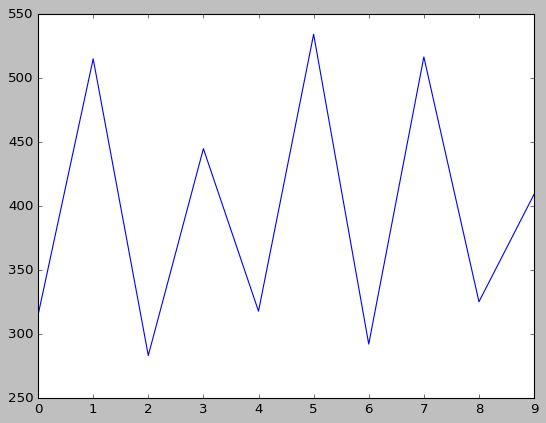

In [144]:
plt.plot(X_df.groupby('Label')[0].mean())
plt.xticks(np.sort(X_df['Label'].unique()))
plt.show()

Need to add Text to the labels

<Figure size 640x480 with 0 Axes>

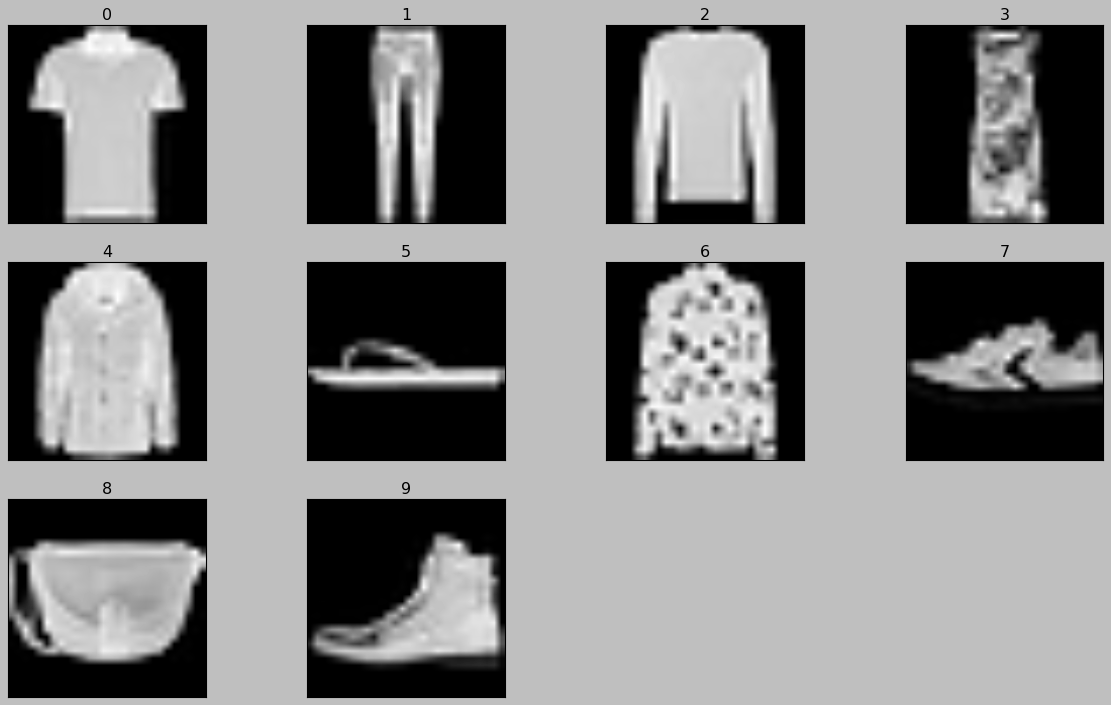

In [142]:
labels = np.sort(X_df['Label'].unique()).tolist()
images_to_show = np.full(len(labels), None)
while len(labels) > 0:
    label = labels.pop()
    images_to_show[label] = [label, X_images[y == label][0]]

# Show Images
plt.figure()

fig = plt.figure()

fig.set_size_inches(18.5, 10.5)

i = 0
for item in images_to_show:
    (label, img) = item
    
    ax = fig.add_subplot((int)(len(images_to_show) / 4)+1, 4, i+1)
        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax.set_title(label)
    ax.imshow(img, cmap='gray')
    
    i += 1

plt.style.use('classic')

plt.show()

Continue with the improving

In [172]:
class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self, background_limit=0, **kwargs):
        self.background_limit = background_limit
        
        self._param_names = ['background_limit'] + list(kwargs.keys())
        for key, value in kwargs.items():
            setattr(self, key, value)
        
    def get_params(self, deep=True):
        return { param: getattr(self, param) for param in self._param_names}
        
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
                
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images_zero = X_images == 0
        
        feature_list = []
        for image in X_images_zero:
            rows = np.sum(image, axis=0)
            collumns = np.sum(image, axis=1)
            feature_list.append(np.block([rows,collumns]))
        
        feature_list_df = pd.DataFrame(np.array(feature_list))
        
        X_images = X_images > self.background_limit
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                  
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
            
        X_df = pd.DataFrame(X_vectors)
                        
        return pd.concat([feature_list_df, X_df], axis=1)

steps = [
    ('pre_processing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

param_grid = {
    'pre_processing__background_limit': [3]
}

model = GridSearchCV(
    model, param_grid,
    cv = 5
)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)
# 85.07% by lior

0.8507936507936508

In [ ]:
class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self, background_limit=0, **kwargs):
        self.background_limit = background_limit
        
        self._param_names = ['background_limit'] + list(kwargs.keys())
        for key, value in kwargs.items():
            setattr(self, key, value)
        
    def get_params(self, deep=True):
        return { param: getattr(self, param) for param in self._param_names}
        
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
                
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images_zero = X_images == 0
        
        feature_list = []
        for image in X_images_zero:
            rows = np.sum(image, axis=0)
            collumns = np.sum(image, axis=1)
            feature_list.append(np.block([rows,collumns]))
        
        feature_list_df = pd.DataFrame(np.array(feature_list))
        
        X_images = X_images > self.background_limit
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                  
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
            
        X_df = pd.DataFrame(X_vectors)
                        
        return pd.concat([feature_list_df, X_df], axis=1)

steps = [
    ('pre_processing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

param_grid = {
    'pre_processing__background_limit': [3]
}

model = GridSearchCV(
    model, param_grid,
    cv = 3
)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)
# 